# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [34]:
!pip install citipy

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

## Perform API Calls

In [37]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sibolga
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | san carlos de bariloche
Processing Record 8 of Set 1 | klerksdorp
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | mountain home
Processing Record 13 of Set 1 | dyersburg
Processing Record 14 of Set 1 | creel
Processing Record 15 of Set 1 | xai-xai
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | la vega
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | viedma
Proces

Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | kharp
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | aracataca
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | methoni
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | darhan
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | tiksi
Processing Record 0 of Set 5 | new norfolk
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | pasir gudang
Processing Record 4 of Set 5 | presidencia roque saenz pena
Processing Record 5 of Set 5 | chapais
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | warqla
City not found. Skipping...
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 10 o

Processing Record 29 of Set 8 | kansanshi
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | timbiqui
Processing Record 32 of Set 8 | ponta delgada
Processing Record 33 of Set 8 | san andres
Processing Record 34 of Set 8 | kloulklubed
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 37 of Set 8 | norrtalje
Processing Record 38 of Set 8 | sterling
Processing Record 39 of Set 8 | botou
Processing Record 40 of Set 8 | nehe
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | berlevag
Processing Record 43 of Set 8 | mutoko
Processing Record 44 of Set 8 | monrovia
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | de haan
Processing Record 47 of Set 8 | severo-yeniseyskiy
Processing Record 48 of Set 8 | makasar
Processing Record 49 of Set 8 | samarai
Processing Record 0 of Set 9 | pacific grove
Processing Record 1 of Set 9 | yaan
Process

Processing Record 19 of Set 12 | gloversville
Processing Record 20 of Set 12 | longyearbyen
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | yatou
Processing Record 23 of Set 12 | ystad
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | namibe
Processing Record 26 of Set 12 | buckeye
Processing Record 27 of Set 12 | wellington
Processing Record 28 of Set 12 | perth
Processing Record 29 of Set 12 | kasra
City not found. Skipping...
Processing Record 30 of Set 12 | ancud
Processing Record 31 of Set 12 | sokolka
Processing Record 32 of Set 12 | krasnyy chikoy
Processing Record 33 of Set 12 | obo
Processing Record 34 of Set 12 | kharan
Processing Record 35 of Set 12 | kadoma
Processing Record 36 of Set 12 | antalaha
Processing Record 37 of Set 12 | caetite
Processing Record 38 of Set 12 | kupang
Processing Record 39 of Set 12 | san jeronimo
Processing Record 40 of Set 12 | yar-sale
Processing Record 41 of Set 12 | acapulco
Processing Reco

In [38]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [39]:
# Display the City Data Frame
city_data_pd.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sibolga,1.74,98.78,82.81,71,88,3.96,ID,1590207681
1,sao felix do xingu,-6.64,-51.99,72.37,96,0,1.72,BR,1590207681
2,kapaa,22.08,-159.32,77.00,73,40,13.87,US,1590207682
3,asau,46.43,26.40,48.20,87,40,1.12,RO,1590207682
4,san carlos de bariloche,-41.15,-71.31,39.00,67,100,3.53,AR,1590207682
5,klerksdorp,-26.85,26.67,47.52,54,0,2.19,ZA,1590207682
6,cape town,-33.93,18.42,55.99,87,37,9.17,ZA,1590207682
7,cherskiy,68.75,161.30,34.18,81,87,13.09,RU,1590207682
8,bathsheba,13.22,-59.52,80.60,78,20,13.87,BB,1590207682
9,mountain home,43.13,-115.69,46.40,61,1,12.75,US,1590207682


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,18.900936,19.060069,64.265442,68.627383,52.726170,8.175997,1.590208e+09
std,34.419441,92.277656,15.981068,22.740264,39.212047,5.565374,5.734651e+01
min,-54.800000,-175.200000,20.590000,1.000000,0.000000,0.180000,1.590207e+09
25%,-12.100000,-66.270000,52.450000,55.000000,7.000000,3.830000,1.590208e+09
50%,22.790000,25.080000,64.400000,73.000000,62.000000,6.930000,1.590208e+09
75%,48.380000,101.710000,76.320000,86.000000,90.000000,11.410000,1.590208e+09
max,78.220000,179.320000,107.620000,100.000000,100.000000,27.510000,1.590208e+09


In [41]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sibolga,1.74,98.78,82.81,71,88,3.96,ID,1590207681
1,sao felix do xingu,-6.64,-51.99,72.37,96,0,1.72,BR,1590207681
2,kapaa,22.08,-159.32,77.00,73,40,13.87,US,1590207682
3,asau,46.43,26.40,48.20,87,40,1.12,RO,1590207682
4,san carlos de bariloche,-41.15,-71.31,39.00,67,100,3.53,AR,1590207682


In [43]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

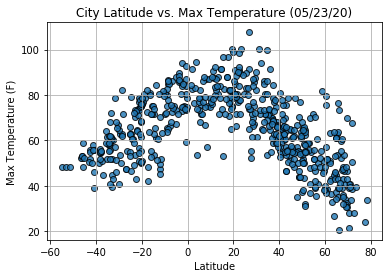

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatTemp.png")

# Show plot
plt.show()

In [79]:
#There is a trend shown here where max temperatures increase the closer the latitude gets to 0, or the equator.

## Latitude vs. Humidity Plot

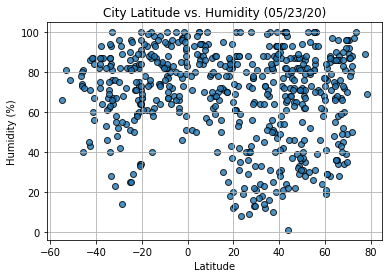

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatHumidity.png")

# Show plot
plt.show()

In [81]:
#There does not seem to be any noticeable pattern or correlation between latitude and humidity,

## Latitude vs. Cloudiness Plot

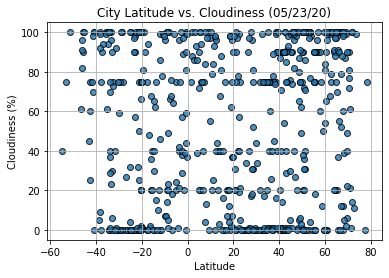

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatClouds.png")

# Show plot
plt.show()

In [83]:
#There looks to be a large amount of cities that have cloudiness percentages near 0% and 100% as shown by the lines at those y values.

## Latitude vs. Wind Speed Plot

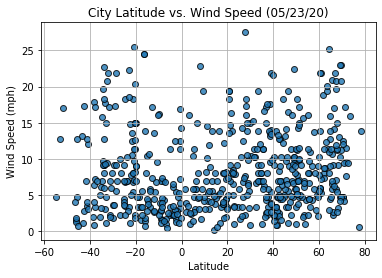

In [84]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatWind.png")

# Show plot
plt.show()

In [51]:
#There is a cluster of wind speeds near the lower levels but there does not seem to be a strong correlation between latitude and wind speeds.

## Linear Regression

In [52]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5924517288186963


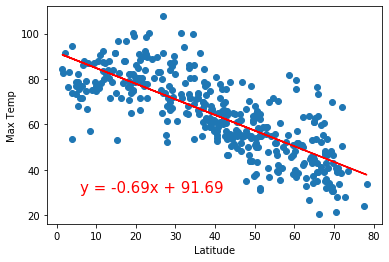

<Figure size 432x288 with 0 Axes>

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))
plt.savefig("output_data/FigtempLat.png")
plt.show()

In [55]:
#As we predicted, there is a correlation between temperatures and latitude.

The r-squared is: 0.4402164200302052


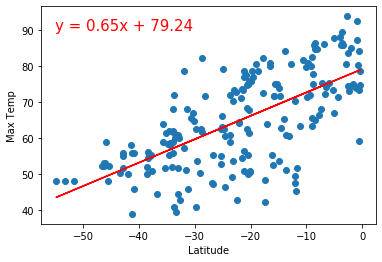

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

In [57]:
#As we predicted, there is a correlation between temperatures and latitude.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001377293014652996


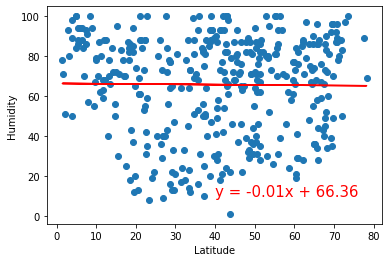

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [59]:
#There does not seem to be a relationship between humidity and latitude as shown by the small r-squared value and slope of the line.

The r-squared is: 0.04882673451896857


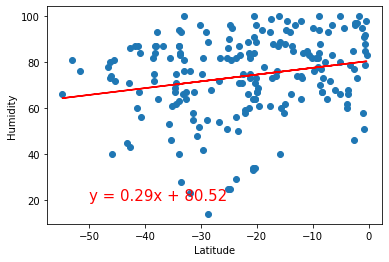

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

In [61]:
#This also indicates that there is not a relationship between humidity and latitude as shown by the small r-squared value and slope of the line.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014655753892368504


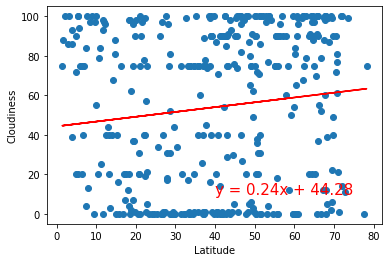

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

In [63]:
#There does not appear to be a strong correlation between cloudiness and latitude.

The r-squared is: 0.01171074652883357


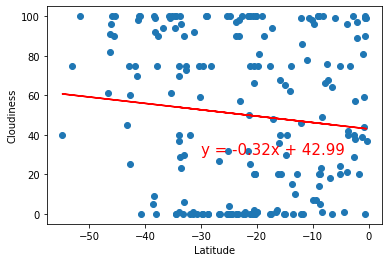

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [65]:
#There does not appear to be a strong correlation between cloudiness and latitude.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03917822530528826


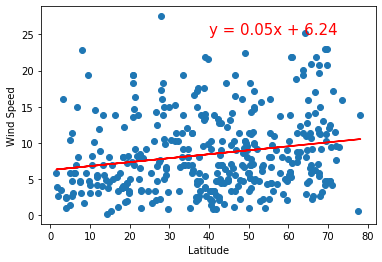

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

In [67]:
#Again, no strong correlation between wind and latitude. There is a slight increasing slope as latitude increases.

The r-squared is: 0.02775956167357865


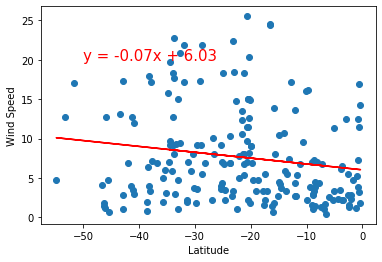

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

In [69]:
#Again, no strong correlation between wind and latitude. There is a slight decreasing slope as latitude increases.